In [13]:
from __future__ import division
from IPython.display import HTML
from IPython.display import display
from scipy.optimize import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Question 1: Linear Regression, Curvature Matrix

Consider the data listed below,
\begin{equation}
\begin{array}{lcccccc}
\hline
{\rm frequency~(Hz)} &10&20&30&40&50&60\\
{\rm voltage~(mV)} &16&45&64&75&70&115\\
{\rm error~(mV)}   &5&5&5&5&30&5\\
\hline
{\rm frequency~(Hz)} &70&80&90&100&110&\\
{\rm voltage~(mV)} &142&167&183&160&221&\\
{\rm error~(mV)}   &5&5&5&30&5&\\
\hline
\end{array} 
\end{equation}

This data is also contained in the file 'linear_regression.csv'.

Required:
<bf>
> (i) Calculate the 4 elements of the curvature matrix.
<bf>
> (ii) Invert this to give the error matrix.
<bf>
> (iii) What are the uncertainties in the slope and intercept?
<bf>
> (iv) Comment on your answer.

### (i) Calculate the 4 elements of the curvature matrix.

In [14]:
data = pd.read_csv('linear_regression.csv')
frequencies = data.iloc[:,0]
voltages = data.iloc[:,1]
voltage_errors = data.iloc[:,2]

def one_i():
    '''Your function should return something of the form np.matrix([[a_cc,a_cm],[a_mc,a_mm]])'''
    
    a_cc = 0
    a_cm = 0
    a_mm = 0
    for j,i in enumerate(frequencies):
        
        # Note given we are assuming linear regression we can use the formulae
        # 7.23 - 7.25 in the Huges and Hayes book
        alpha_i = voltage_errors[j]
        a_cc += (1/(alpha_i**2))
        a_cm += (i/(alpha_i**2))
        a_mm += (i**2/(alpha_i**2))
    a_mc = a_cm
    curvature_matrix = np.matrix([[a_cc,a_cm],[a_mc,a_mm]])

    return curvature_matrix
one_i()

matrix([[3.62222222e-01, 2.05666667e+01],
        [2.05666667e+01, 1.53788889e+03]])

### (ii) Invert this to give the error matrix.

In [15]:
data = pd.read_csv('linear_regression.csv')
frequencies = data.iloc[:,0]
voltages = data.iloc[:,1]
voltage_errors = data.iloc[:,2]

def one_ii():
    '''Your function should return something of the form np.matrix([[a_cc,a_cm],[a_mc,a_mm]])'''

    curvature_matrix = one_i()
    inverted_matrix = curvature_matrix.I

    return inverted_matrix

one_ii()

matrix([[ 1.14708117e+01, -1.53402734e-01],
        [-1.53402734e-01,  2.70174453e-03]])

### (iii) What are the uncertainties in the slope and intercept?

In [16]:
data = pd.read_csv('linear_regression.csv')
frequencies = data.iloc[:,0]
voltages = data.iloc[:,1]
voltage_errors = data.iloc[:,2]

def one_iii():
    slope_uncertainty = 0
    intercept_uncertainty = 0

    error_matrix = one_ii()
    slope_uncertainty = np.sqrt(error_matrix[1,1])
    intercept_uncertainty = np.sqrt(error_matrix[0,0])

    return slope_uncertainty,intercept_uncertainty

one_iii()

(0.051978308277218006, 3.3868586735217345)

### (iv) Comment on your answer

We did the same analysis last week and got the same answer with a different method.

The diagonal elements of the error matrix are also not equal to the inverse of the diagonal elements of the curvature matrix and therefore suggest a correlation between the errors in the gradient and intercept. More specifically, since the off-diagonal elemements of the error matrix are negative (and therefore so are the values of the off-diagonal correlation matrix), the two variables are negatively correlated.

The error on the intercept is much larger than the error on the gradient. Given that the errors in the y-data (the voltage) are large relative to the negligible error in the x-data (frequency) this is not surprising.

## Question 2: Using a calibration curve

A frequently encountered case where the correlation of the uncertainties must be taken into account is that of a calibration curve.  Consider the following set of measurements from an optical-activity experiment, where the angle of rotation of a plane-polarized light beam, $\theta$, is measured as a function of the independent variable, the concentration, $C$, of a sucrose solution. 

\begin{equation}
\begin{array}{lcccc}
\hline
C \mbox{ (g cm$^{-3}$)} &0.025&0.05&0.075&0.100\\
\theta \mbox{ (degrees)}&10.7&21.6&32.4&43.1\\
\hline
C \mbox{ (g cm$^{-3}$)}&0.125&0.150&0.175\\
\theta \mbox{ (degrees)}&53.9&64.9&75.4\\
\hline
\end{array} 
\end{equation}

The errors in the angle measurement are all $0.1^{\circ}$, the errors in the concentration are negligible.  A straight line  fit to the data yields  a gradient of $431.7\,^{\circ}\mbox{ g$^{-1}$ cm$^{3}$}$, and intercept $-0.03^{\circ}$. This data is contained in 'optical_activity.csv'.

<bf>
Required:
<bf>
>(i) Show that the curvature matrix, $\mathsf{A}$, is given by 

\begin{equation}
\mathsf{A}=\left[\begin{array}{cc}
700\left((^{\circ})^{-2}\right)&70\left((^{\circ})^{-2}\mbox{g cm$^{-3}$}\right)\\
70\left((^{\circ})^{-2}\mbox{g cm$^{-3}$}\right)&8.75\left((\mbox{g/$^\circ$ cm$^{3})^2$}\right)\\
\end{array}\right] ,
\end{equation}


>and that the error matrix  is 

\begin{equation}
\mathsf{C}=\left[\begin{array}{cc}
0.00714\left((^{\circ})^2\right)&-0.0571\left((^{\circ})^2\mbox{g$^{-1}$cm$^{3}$}\right)\\
-0.0571\left((^{\circ})^2\mbox{g$^{-1}$cm$^{3}$}\right)&0.571\left((^{\circ})^2\mbox{g$^{-2}$ cm$^{6}$}\right)\\
\end{array}\right] .
\end{equation}

The entry for the intercept is in the top left-hand corner, that for the gradient in the bottom right-hand corner.  
<bf>
>(ii) Calculate the associated correlation matrix.  

Use the  entries of the error matrix to answer the following  questions: 
<bf>
>(iii) What are the uncertainties in the best-fit intercept and gradient? 
<bf>
>(iv) What optical rotation is expected for a known concentration of $C=0.080g cm^{-3}$, and what is the uncertainty? 
<bf>
>(v) What is the concentration given a measured rotation of $\theta=70.3^{\circ}$ and what is the uncertainty?

### (i) Verify the curvature matrix and the error matrix above.

In [17]:
data = pd.read_csv('optical_activity.csv')
concentrations = data.iloc[:,0]
angles = data.iloc[:,1]
angle_errors = data.iloc[:,2]

def two_i():
    '''Your function should return something of the form np.matrix([[a_cc,a_cm],[a_mc,a_mm]]). Must return the curvature and error matricies)'''
    curvature_matrix = 0
    error_matrix = 0

    a_cc = 0
    a_cm = 0
    a_mm = 0
    for j,i in enumerate(concentrations):
        alpha_i = angle_errors[j]
        a_cc += (1/(alpha_i**2))
        a_cm += (i/(alpha_i**2))
        a_mm += (i**2/(alpha_i**2))
    a_mc = a_cm
    
    curvature_matrix = np.matrix([[a_cc,a_cm],[a_mc,a_mm]])
    error_matrix = curvature_matrix.I

    return curvature_matrix,error_matrix

two_i()

(matrix([[700.  ,  70.  ],
         [ 70.  ,   8.75]]),
 matrix([[ 0.00714286, -0.05714286],
         [-0.05714286,  0.57142857]]))

### (ii) Calculate the associated correlation matrix.  

In [18]:
data = pd.read_csv('optical_activity.csv')
concentrations = data.iloc[:,0]
angles = data.iloc[:,1]
angle_errors = data.iloc[:,2]

def two_ii():
    '''Your function should return something of the form np.matrix([[a_cc,a_cm],[a_mc,a_mm]])'''
    
    matricies = two_i()
    error_matrix = matricies[1]
    diagonal_element = 1
    off_diagonal = error_matrix[0,1]/np.sqrt(error_matrix[0,0]*error_matrix[1,1])
    correlation_matrix = np.matrix([[1,off_diagonal],[off_diagonal,1]])

    return correlation_matrix
two_ii()

matrix([[ 1.        , -0.89442719],
        [-0.89442719,  1.        ]])

### (iii) What are the uncertainties in the best-fit intercept and gradient? 

In [19]:
data = pd.read_csv('optical_activity.csv')
concentrations = data.iloc[:,0]
angles = data.iloc[:,1]
angle_errors = data.iloc[:,2]

def two_iii():
    '''Your function should return the uncertainty in the gradient and intercept'''
    gradient_uncertainty = 0
    intercept_uncertainty = 0

    matricies = two_i()
    error_matrix = matricies[1]
    intercept_uncertainty = np.sqrt(error_matrix[0,0])
    gradient_uncertainty = np.sqrt(error_matrix[1,1])

    return gradient_uncertainty,intercept_uncertainty

two_iii()

(0.7559289460184541, 0.08451542547285162)

### (iv) What optical rotation is expected for a known concentration of $C=0.080g cm^{-3}$, and what is the uncertainty? 

In [20]:
data = pd.read_csv('optical_activity.csv')
concentrations = data.iloc[:,0]
angles = data.iloc[:,1]
angle_errors = data.iloc[:,2]

def two_iv():
    '''Your function should return the angle and the uncertainty'''
    angle = 0
    uncertainty = 0

    matricies = two_i()
    error_matrix = matricies[1]
    print (error_matrix)
    angle = (431.7*0.08)-0.03
    
    # combine errors together
    uncertainty = np.sqrt(((0.08**2)*error_matrix[1,1])+error_matrix[0,0]+(2*0.08*error_matrix[0,1]))

    return angle,uncertainty

two_iv()

[[ 0.00714286 -0.05714286]
 [-0.05714286  0.57142857]]


(34.506, 0.04070801956792859)

### (v) What is the concentration given a measured rotation of $\theta=70.3^{\circ}$ and what is the uncertainty? You must return your answer in $gcm^{-3}$

In [21]:
data = pd.read_csv('optical_activity.csv')
concentrations = data.iloc[:,0]
angles = data.iloc[:,1]
angle_errors = data.iloc[:,2]

def two_v():
    '''Your function should return the concentration and uncertainty'''

    matricies = two_i()
    error_matrix = matricies[1]
    concentration = 70.33/431.7 #Should be 0.16291 gcm^-3
    uncertainty = (1/431.7)*np.sqrt(((0.16291**2)*0.571)+0.00714+(2*0.16291*(-0.0571)))

    return concentration,uncertainty

two_v()

(0.16291406069029418, 0.00014070872926728317)

## Question 3: Error bars from a $\chi^2$ minimisation to a non-linear function

In this question we will analyse the data shown in the figure below, which is an X-ray spectrum as a function of angle.

![title](./diffraction.JPG)
 
The data is contained in the file 'LorentzianData.csv'. There are three columns: the angle, the signal (in counts per second), and the error.  The number of X-rays counted in 20 seconds was recorded.

The model to describe the data has four parameters:  the height of the Lorentzian lineshape, $S_0$; the angle at which the peak is centered, $\theta_{0}$;
 the angular width of the peak, $\Delta\theta$; and a constant background offset, $S_{\rm bgd}$. Mathematically, the signal, $S$, is of the form:
\begin{equation}
S=S_{\rm bgd}+\frac{S_{0}}{1+4\left(\frac{\theta-\theta_{0}}{\Delta\theta}\right)^2}.
\end{equation}

and the function is defined by `lorentzian(theta, s_0, s_bgd,delta_theta,theta_0)`.

Required:
<bf>
>(i) Explain how the error in the count rate was calculated.
<bf>
>(ii) Perform a $\chi^2$ minimisation.  What are the best-fit parameters?
<bf>
>(iii) Evaluate the error matrix.
<bf>
>(iv) Calculate the correlation matrix.
<bf>
>(v) What are the uncertainties in the best-fit parameters?
<bf>
>(vi) If you can plot contour plots, show the $\chi^2$ contours for 
<bf>
>>(a) background--peak centre. 
<bf>
>>(b) background--peak width.  
<bf>
>These figures are shown in figure 6.11 of Hughes and Hase. Comment on the shape of the contours.
<bf>

### (i) Explain how the error in the count rate was calculated.

The errors were calculated using Poisson statistics. As each count rate was calculated by measuring the number of counts in $20$ s, the error in the rate was given by taking the square root of the number of counts calculated in this interval, and then dividing it by this length of time. Synbolically, if $\tau$ is the amount of time the measurement was taken over and $dN/dt$ the calculated count rate, then

$$\alpha_{dN/dt} = \sqrt{\frac{dN/dt}{\tau}}~.$$

### (ii) Perform a $\chi^2$ minimisation.  What are the best-fit parameters?

(5.4263352119603745, 1.4044049238755842, 0.9498788979210941, 44.39011991115929, array([[ 4.48037865e-02,  4.49948193e-04, -6.89983405e-03,
         2.50865799e-05],
       [ 4.49948193e-04,  9.19638504e-04, -7.78136811e-04,
        -2.60248176e-06],
       [-6.89983405e-03, -7.78136811e-04,  2.33241895e-03,
        -8.64073786e-07],
       [ 2.50865799e-05, -2.60248176e-06, -8.64073786e-07,
         2.68738782e-04]]))


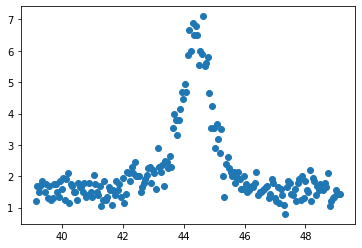

In [22]:
data = pd.read_csv('LorentzianData.csv') 

def lorentzian(theta, s_0, s_bgd,delta_theta,theta_0):
    return s_bgd+(s_0/(1+4*(((theta-theta_0)/delta_theta)**2)))

def three_ii():
    s_0 = 0
    s_bgd = 0
    delta_theta = 0
    theta_0 = 0
    covariance_matrix = 0
    angles = data.iloc[:,0]
    intensity = data.iloc[:,1]
    intensity_errors = data.iloc[:,2]
    
   
    guess = np.array([5.,1.,0.5,44.])
    #guess = np.array([5.42,1.40,0.94,44.39])
    popt,pcov= curve_fit(lorentzian, angles, intensity, guess, sigma=intensity_errors)
    covariance_matrix = pcov
    s_0= popt[0]
    s_bgd = popt[1]
    theta_0 = popt[3]
    delta_theta = popt[2]
    angles_1 = np.arange(39,50,0.01)
    intensity_1 = []
    for i in angles_1:
        element = s_bgd + (s_0/(1+4*((i-theta_0)/delta_theta)**2))
        intensity_1.append(element)
  
    return(s_0,s_bgd,delta_theta,theta_0,covariance_matrix)

print(three_ii())

plt.scatter(data.iloc[:,0], data.iloc[:,1])

### (iii) Evaluate the error matrix.

In [12]:
data = pd.read_csv('LorentzianData.csv') 

def three_iii():
    '''Your function should return something of the form np.matrix([[a_cc,a_cm],[a_mc,a_mm]])'''

    cov_matrix = np.matrix(three_ii()[4])
    error_matrix = cov_matrix

    return error_matrix

three_iii()

matrix([[ 4.48037868e-02,  4.49948224e-04, -6.89983416e-03,
          2.50865719e-05],
        [ 4.49948224e-04,  9.19638504e-04, -7.78136815e-04,
         -2.60248292e-06],
        [-6.89983416e-03, -7.78136815e-04,  2.33241897e-03,
         -8.64070683e-07],
        [ 2.50865719e-05, -2.60248292e-06, -8.64070683e-07,
          2.68738782e-04]])

### (iv) Calculate the correlation matrix.

In [13]:
data = pd.read_csv('LorentzianData.csv') 

def three_iv():
    '''Your function should return something of the form np.matrix([[a_cc,a_cm],[a_mc,a_mm]])'''

    cov_matrix = np.matrix(three_ii()[4])
    correlation_matrix = np.corrcoef(cov_matrix)
    
    return correlation_matrix

three_iv()

array([[ 1.        ,  0.39467889, -0.97924002, -0.17658699],
       [ 0.39467889,  1.        , -0.56789937, -0.1189287 ],
       [-0.97924002, -0.56789937,  1.        ,  0.13840403],
       [-0.17658699, -0.1189287 ,  0.13840403,  1.        ]])

### (v) What are the uncertainties in the best-fit parameters?

In [14]:
data = pd.read_csv('LorentzianData.csv') 

def three_v():
    uncertainty_s_0 = 0
    uncertainty_s_bgd = 0
    uncertainty_delta_theta = 0
    uncertainty_theta_0 = 0

    error_mat = three_iii()
    uncertainty_s_0 = np.sqrt(error_mat[0,0])
    uncertainty_s_bgd = np.sqrt(error_mat[1,1])
    uncertainty_delta_theta = np.sqrt(error_mat[2,2])
    uncertainty_theta_0 = np.sqrt(error_mat[3,3])

    return uncertainty_s_0,uncertainty_s_bgd,uncertainty_delta_theta,uncertainty_theta_0

three_v()

(0.21166905028326,
 0.030325542109700922,
 0.048295123658362346,
 0.016393254169001014)

### (vi) These contours are shown in figure 6.11 of Hughes and Hase. Comment on the shape of the contours.

The contours are not entirely elliptical; this is due to the non-linear fit. The contours for the background-width plot are flatter near the minimum than those of the background-centre plot.

## Question 4: Prove the following properties:

Assume in this question that the uncertainties in $A$ and $B$ are correlated.
>(i) If $Z=A\pm B$, show that
${\displaystyle\alpha_{Z}^2=\alpha_{A}^2+\alpha_{B}^2\pm2\alpha_{AB}}$.
<bf>
>(ii) If $Z=A\times B$, show that
 ${\displaystyle\left(\frac{\alpha_Z}{Z}\right)^2=\left(\frac{\alpha_A}{A}\right)^2+\left(\frac{\alpha_B}{B}\right)^2+2\left(\frac{\alpha_{AB}}{AB}\right)}$.
<bf>
>(iii) If ${\displaystyle Z=\frac{A}{B}}$, show that
${\displaystyle\left(\frac{\alpha_Z}{Z}\right)^2=\left(\frac{\alpha_A}{A}\right)^2+\left(\frac{\alpha_B}{B}\right)^2-2\left(\frac{\alpha_{AB}}{AB}\right)}$.

The necessary equations to solve this question can be found in Chapter 7.3 of the book.

$Z$ is defined as a function of $A$ and $B$, i.e. $Z = Z(A,B)$. To first order, its spread is given by the expansion

\begin{equation}
Z - \bar Z = \partial_AZ(A - \bar A ) + \partial_BZ(B - \bar B ) \, ,
\end{equation}

where $\bar X$ denotes the mean value of the parameter and we have used the notation $\partial_yX$ to denote the partial derivative $\frac{\partial X}{\partial y}$.

For a large number N, the standard deviation of $Z$ is defined as 

\begin{equation}
\alpha_Z^2 = (\partial_AZ)^2\alpha_A^2 + (\partial_BZ)^2\alpha_B^2 + 2\,\partial_AZ\, \partial_BZ\, \alpha_{A,B} \, ,
\end{equation}

see Eq.(2.28) in the book. To prove the above properties (i)-(iii), we simply need to calculate the partial derivative and plug them into the equation above. 


i) $Z = A \pm B.\quad \partial_AZ = 1,\quad \partial_BZ = \pm1$.

\begin{eqnarray}
\alpha_Z^2 &=& (1)^2\alpha_A^2 + (\pm1)^2\alpha_B^2 + 2\cdot(1\cdot(\pm1))\, \alpha_{A,B} \\
                       &=& \alpha_A^2 + \alpha_B^2 \pm 2\alpha_{A,B} \, .\quad\square
\end{eqnarray}



ii) $Z = A \cdot B.\quad \partial_AZ = B,\quad \partial_BZ = A$.

\begin{eqnarray}
\alpha_Z^2 &=& B^2\alpha_A^2 + A^2\alpha_B^2 + 2AB\alpha_{A,B}\\
\left(\frac{\alpha_Z}{Z}\right)^2 &=& \frac{1}{A^2B^2}\left(B^2\alpha_A^2 + A^2\alpha_B^2 + 2AB\alpha_{A,B}\right) \\
       &=& \left(\frac{\alpha_A}{A}\right)^2 + \left(\frac{\alpha_B}{B}\right)^2 + \frac{2\alpha_{AB}}{AB}\, .\quad\square
\end{eqnarray}


iii) $Z = \frac{A}{B}.\quad \partial_AZ = 1/B,\quad \partial_BZ = -A / B^2$.

\begin{eqnarray}
\alpha_Z^2 &=& \left(\frac{1}{B}\right)^2\alpha_A^2 + \left(-\frac{A}{B^2}\right)^2\alpha_B^2 - 2\frac{A}{B^3}\alpha_{A,B} \\
 \left(\frac{\alpha_Z}{Z}\right)^2 &=& \frac{B^2}{A^2}\left(\left(\frac{1}{B}\right)^2\alpha_A^2 + \left(-\frac{A}{B^2}\right)^2\alpha_B^2 - 2\frac{A}{B^3}\alpha_{A,B}\right) \\
        &=& \left(\frac{\alpha_A}{A}\right)^2 + \left(\frac{\alpha_B}{B}\right)^2 - \frac{2\alpha_{AB}}{AB}
        \, .\quad\square
\end{eqnarray}